# <center> A Complete Guide to Decision Trees </center>

## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is a Decision Tree?
    - 1.2 How does a Decision Tree work?
        
        
- [2. How to construct a Decision Tree?](#2)
    - 2.1 How to split at a node?
    - 2.2 How to find the best split?
    - 2.3 Entropy
    - 2.4 Gini Index
    - 2.5 Greedy Algorithm
    
    
- [3. How to prevent overfitting?](#3)
    - 2.1 Pre-pruning and Post-pruning
    - 2.2 Bagging Algorithm
    - 2.3 Random Forest
    - 2.4 Graident Boosting


- [4. Example: Spaceship Titanic Survival Prediction](#4)
    - 3.1 Tuning hyperparameters
    - 3.2 Cross-Validation

Have a look at these notebooks if you want to learn about:

1. **Linear Regression**: [A Complete Guide to Linear Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-linear-regression)
2. **Regularized Regression**: [A Complete Guide to Regularized Regressions](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-regularized-regressions)
3. **Logistic Regression**: [A Complete Guide to Logistic Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-logistic-regression)
4. **Support Vector Machine**: [A Complete Guide to Support Vector Machine](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)

<a id="1"></a>

# <center>Introduction</center>

## What is a Decision Tree?

**`Decision Tree`** is a **supervised learning algorithm** that can be used to solve **both classification and regression** problems which can deal with both **categorical and numerical** (continuous) input and output variables. It is a great method to model **non-linear relationships** between variables.

A **decision tree** is contructed of a **root node**, **internal nodes**, **branches**, and **decision nodes**. For example, the following decision tree is to help me decide whether to accept a job:

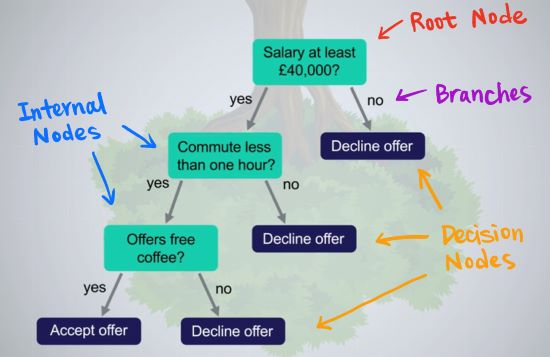

## How does a Decision Tree work?

As demonstrated above, a decision tree starts itself with a **`root node`** and continuously splits down into **`internal nodes`** and finally reaches the **`decision nodes`**.

Let's have look at an exmple of **binary classification**: every split on the decision tree segments the data into 2 groups and iteratively data points with different classes (red and green) are distinguished.

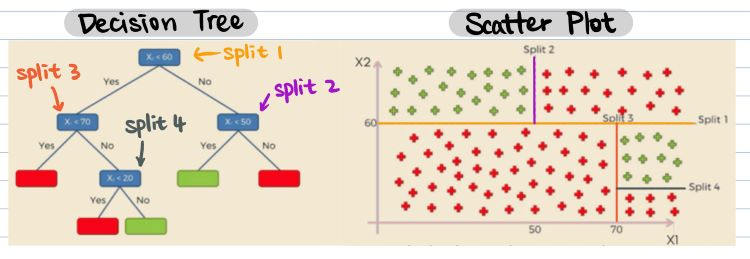

The above example is an ideal scenario where as **in practice** the decision nodes will most likely contain **more than 1 class of data points** (not pure). Under such condition, the final classification result will be the **majority class**. Similarly, in the case of regression problems the final outcome will be the **mean value** of the data points.

Now, here come the questions: how does a decision tree know...

1. how to **split**  at a node?
2. how to find the **best split**?

<a id="2"></a>

# <center>How to construct a Decision Tree</center>

## How to split at a node?

How to split at a node based on an **input variable** depends on the type of the variable: **categorical** or **numerical**.

In the case of **`categorical variables`**, there are **3 popular choices** implemented in practice: (disadvantage)

1. create 1 child node for **each category** (can lead to a **biased selection** of splits)
2. create 2 child nodes: **a particular category vs rest** (can result in a very **deep tree**)
3. create 2 child nodes: **a subset of categories vs rest** (need to evaluation a **large number of possible splits**)

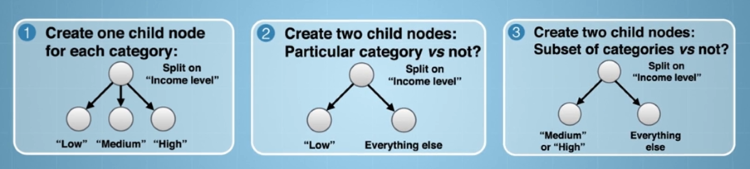

For **`numerical variables`**, we typically consider **binary splits** only. 

Here is how we find the **possible splits** for a numerical variable:

1. sort the data points in **ascending order**
2. find the **mid-points** of consecutive data points
3. a possible split will be either **less or equal** to a mid-point or **greater** than a mid-point

Among these possible splits, how do we find the **best split** at an internal node?

## How to find the best split?

To find the **best split**, we have to evaluate **all the possible splits** for **each feature** at that node and find the one that **maximises the** **`information gain`**.

**Information gain** is the evaluation of how much **new information** is given by a specific split. For example, in **classification trees**, a split is considered to have information gain if the data points in the **child nodes** become **less impure**:

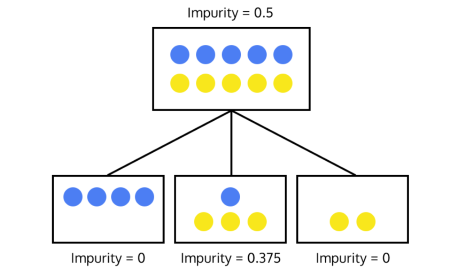

There are 2 common ways to measure this **impurity level** at a node: **Entropy** and **Gini Index**.

## Entropy

**`Entropy`** is the **minimum number of bits** expected to encode all realisation of a variable. 

Let me show you how it is calculated through the same example:

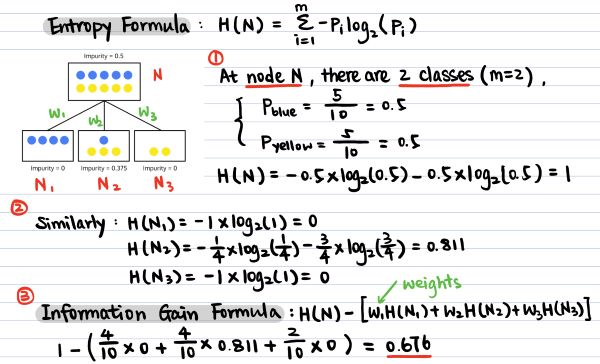

As you can see, child nodes with the **least impurity** (N1 and N3) are having **smaller entropy values**. Therefore, a small entropy value means a **better classification** result. 

## Gini Index

**`Gini Index`** is the **probability** that a randomly chosen training data is **mislabelled** if it is labelled randomly according to the training data **proportions** in the node. 

Refering back to the same example, let's do the calculation using **gini index** this time:

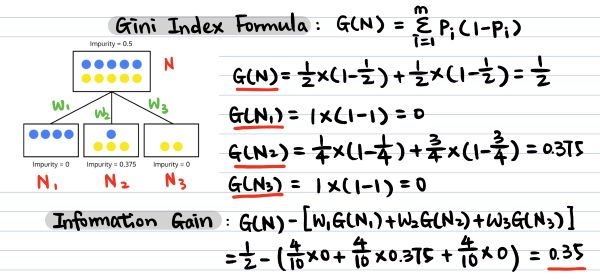

Similar to **entropy**, a smaller value of **gini index** indicates a **higher level of purity** of data points within a node.

## Greedy Algorithm

Now, we know that a decision tree choose the **best internal node** by finding the split that **maximise the information gain** calculated based on either the **entropy** or the **gini index**.

However, when making such a **split selection** for a specific node, the decision tree is considering the **local optimal** solution but not the **globally optimal** solution. This is, the **best splits** chosen might not result in the **best overall classification result**.

A decision tree is constructed from **top to bottom** progressively which makes the model unable to consider the **combined effect of all the splits** on the classification outcome at a single node. The model only finds the **best split** at the current node and repeatedly until the tree is constructed.

This type of algorithm is known as the **`greedy algorithm`**.

<a id="3"></a>

# <center>How to prevent overfitting?</center>

Decision trees are good at **modelling non-linear relationships** but they have the tendency to **`overfits` the training data**. The biggest reason a decision tree overfits the data is that it **grows too deep**. Therefore, the most straight forward method to prevent overfitting is to **"prune"** the tree.

## Pre-pruning and Post-pruning

**Pruning** is the action of **reducing the depth** of a decision tree to prevent it from overfitting the training data. There are 2 ways that a decision tree can be pruned: **pre-pruning** and **post-pruning**.

**`Pre-pruning`** is to set a limit to the depth **before** constructing the tree. This can be achieve by either setting a **specific value for the depth** or setting a **minimum information gain value** that a new split must achieve to exist. 

The problem with **pre-pruning** is that **good splits** might be missed out. Therefore, **`post-pruning`** is oftenly use to allow a **complete tree** to be constructed first. **Post-pruning**, also called **cost-complexity pruning**, finds the best subtree that **minimize** the following obejective function:

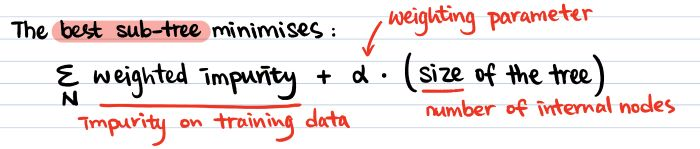

By minimizing this function, we will obtain a decision tree that has **small impurity** (good classification result) while remaining a **reasonable size**. The weighting parameter **alpha** controls how much we want to **prune** our decision tree model.

## Bagging Algorithm

**Overfitting** means that a decision tree is **highly dependent of the training data**. For example, if you split the training data into 2 sets and grow a decision tree on each set, these 2 decision trees will look **substantially different** in most cases. Thus, indicating the presence of **high variance** of the model.

**`Bagging`** is a method to **reduce the variance** by combining **boostrapping** and **averaging**. That is, to grow **multiple decision trees** on subsets of training data (sampled with boostrapping) and average their outputs to be the final outcome.

Now, let me show you why **averaging** can reduce the variance:

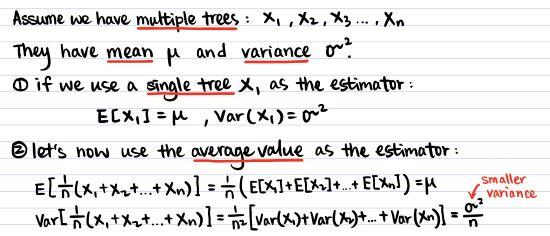

However, in bagging algorithm the decision trees grow are most likely to be **highly correlated** to each other because they are using **similar training datasets**. For highly correlated estimators, this reduction in variance **no longer holds**:


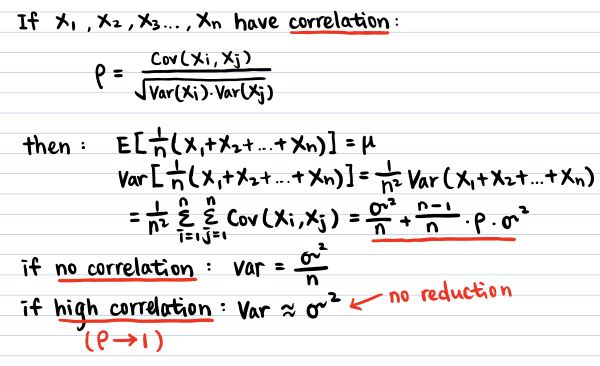

**Higher the correlations** among the decision trees, **smaller the effect** of bagging on mitigating overfitting.

To **decorrelate** the decision trees, there are 2 popular ensemble methods: **Random Forest** and **Boosting**.

## Random Forest

In **`Random Forest`**, each **sub-tree** only considers a **subset of the predictors** (features) to prevent high correlations between the trees. Commonly, each sub-tree will take the **square root** of the total number of features as input varaibles from the training set.

By doing so, **random forest** reduces the **variance** of the model by introducing a **bias**. That is, it prevent the model from **overfitting** the training data in the cost of a possible drop in **classification accuracy**.

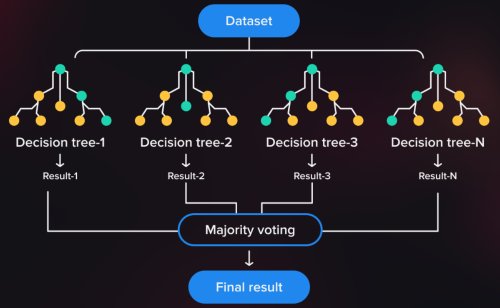

Image Source: https://serokell.io/blog/random-forest-classification

## Gradient Boosting

**`Gradient Boosting`** is another **ensemble algorithm** based on **decision trees** that overcomes the problem of **overfitting**. It **decorrelates** the trees resulting from bagging by attaching a **weight** to each training sample.

Initially, all the training data will have the **same weight**. Then, a **shallow tree** is grown and classification is performed on the training data. The weights of the **misclassified** data points will be increased and these **new weighted training data** will then be again use to grow the next tree. This process is exactly what the word **boosting** means. Typically, this process will continue until **at least thousands of trees** are grown.

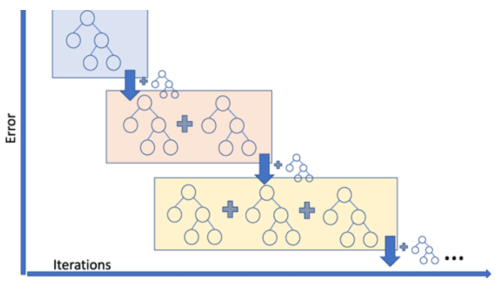

Image Source: https://medium.com/analytics-vidhya/what-is-gradient-boosting-how-is-it-different-from-ada-boost-296f055ecacd

<a id="4"></a>

# <center>Example: Spaceship Titanic Survival Prediction</center>

Competition: https://www.kaggle.com/competitions/spaceship-titanic

In [29]:
import os
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Import Data

In [16]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')

### Data Preparation

In [17]:
df_train['Transported'] = df_train['Transported'].map({True:1, False:0})

df = pd.concat([df_train, df_test], axis=0).copy()
df1 = df.copy()
df1 = df1.drop(['Cabin','Name'], axis=1)


In [18]:
#feature engineering
df2 = df1.copy()
df2['group'] = df2.apply(lambda row: row['PassengerId'][0:4], axis=1)
df2['number'] = df2.apply(lambda row: int(row['PassengerId'][5:7]), axis=1)
df2['FamSize'] = df2.groupby(['group'])['number'].transform(np.sum)
df2 = df2.drop(['PassengerId','group','number'], axis=1)
features = df2.columns.tolist()
features.remove('Transported')
features.append('Transported')
df2 = df2[features].copy()

In [19]:
#standardize data
cat_missing_features = df2.columns[:5].to_list()
cat_missing_features.remove('Age')
num_missing_features = df2.columns[5:-1].to_list()
num_missing_features.append('Age')

df3 = df2.copy()
scaler = StandardScaler()
df3[num_missing_features] = scaler.fit_transform(df3[num_missing_features])

In [20]:
#deal with missing values
df4 = df3.copy()
imputer = KNNImputer(n_neighbors=3)
df4[num_missing_features] = imputer.fit_transform(df4[num_missing_features])

df5 = df4.copy()
for feature in cat_missing_features:
    df5[feature] = df5[feature].fillna(value=df5[feature].mode()[0])

In [21]:
#encode categorical variables
df6 = df5.copy()
for feature in ['HomePlanet','Destination']:
    df6 = pd.get_dummies(df6, columns=[feature])
    df6 = df6.drop([df6.columns[-1]], axis=1)
for feature in ['CryoSleep','VIP']:
    df6[feature] = df6[feature].map({True:1, False:0})

### Split Data

In [22]:
X_train = df6.iloc[:df_train.shape[0],:].copy()
X_train = X_train.drop(['Transported'], axis=1).copy()
y_train = df_train['Transported'].copy()
X_test = df6.iloc[df_train.shape[0]:,:]

### Decision Tree

In [47]:
DT = DecisionTreeClassifier()

DT_param = {'max_depth': np.arange(1,30),
            'max_features': np.arange(2,10),
            'min_samples_leaf': np.arange(1,20),
            'min_samples_split': np.arange(2,20),
            'criterion': ['gini', 'entropy']}

DT_cv = RandomizedSearchCV(DT, param_distributions=DT_param, cv=5, n_iter=20, random_state=0)
DT_cv.fit(X_train, y_train)
DT_cv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 19,
 'max_features': 7,
 'max_depth': 25,
 'criterion': 'gini'}

In [48]:
DT_best = DecisionTreeClassifier(min_samples_leaf = DT_cv.best_params_['min_samples_leaf'],
                                 min_samples_split = DT_cv.best_params_['min_samples_split'],
                                 max_features = DT_cv.best_params_['max_features'],
                                 max_depth = DT_cv.best_params_['max_depth'],
                                 criterion = DT_cv.best_params_['criterion'],
                                 random_state = 0)
DT_best.fit(X_train, y_train)
cv_scores = cross_validate(DT_best, X_train, y_train, scoring='accuracy', cv=5)
score_mean = round(cv_scores['test_score'].mean(), 5)
score_std = round(cv_scores['test_score'].std(), 5)
print(f'Score of Decision Tree: {score_mean} ({score_std})')

Score of Decision Tree: 0.78466 (0.00853)


### Random Forest

In [44]:
RF = RandomForestClassifier(random_state=0)

RF_param = {'n_estimators': [20,50,100,150,200],
            'max_depth': np.arange(1,30),
            'max_features': np.arange(2,10),
            'min_samples_leaf': np.arange(1,20),
            'min_samples_split': np.arange(2,20),
            'criterion': ['gini', 'entropy']}

RF_cv = RandomizedSearchCV(RF, param_distributions=RF_param, cv=5, n_iter=20, random_state=0, verbose=3)
RF_cv.fit(X_train, y_train)
RF_cv.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=23, max_features=4, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.787 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=23, max_features=4, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.784 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=23, max_features=4, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.790 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=23, max_features=4, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.806 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=23, max_features=4, min_samples_leaf=15, min_samples_split=16, n_estimators=50;, score=0.808 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=11, n_estimators=200;, score=0.748 total time=   1.1s
[CV 2/5] END criterion=entrop

{'n_estimators': 150,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_features': 4,
 'max_depth': 21,
 'criterion': 'entropy'}

In [45]:
RF_best = RandomForestClassifier(n_estimators=RF_cv.best_params_['n_estimators'], 
                                 max_features=RF_cv.best_params_['max_features'], 
                                 max_depth=RF_cv.best_params_['max_depth'], 
                                 criterion=RF_cv.best_params_['criterion'],
                                 min_samples_leaf=RF_cv.best_params_['min_samples_leaf'],
                                 min_samples_split=RF_cv.best_params_['min_samples_split'],
                                 random_state = 0)

RF_best.fit(X_train, y_train)
cv_scores = cross_validate(RF_best, X_train, y_train, scoring='accuracy', cv=5)
score_mean = round(cv_scores['test_score'].mean(), 5)
score_std = round(cv_scores['test_score'].std(), 5)
print(f'Score of Random Forest: {score_mean} ({score_std})')

Score of Random Forest: 0.7995 (0.01066)


### Graident Boosting

In [59]:
gbc = GradientBoostingClassifier(random_state=0)

gbc_param = {'n_estimators': [20,50,100,150,200],
             'learning_rate': [0.001, 0.01, 0.1, 1],
             'subsample': np.arange(0.1, 1.1, 0.1),
             'criterion': ['friedman_mse', 'squared_error'],
             'min_samples_split': np.arange(2,20),
             'min_samples_leaf': np.arange(1,20),
             'max_depth': np.arange(1,30),
             'max_features': np.arange(2,10),
             #'loss': ['log_loss','exponential'],
             #min_impurity_decrease,
             #min_weight_fraction_leaf,
             #max_leaf_nodes
            }

gbc_cv = RandomizedSearchCV(gbc, param_distributions=gbc_param, cv=5, n_iter=20, random_state=0, verbose=3)
gbc_cv.fit(X_train, y_train)
gbc_cv.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=18, n_estimators=20, subsample=0.5;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=18, n_estimators=20, subsample=0.5;, score=0.780 total time=   0.1s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=18, n_estimators=20, subsample=0.5;, score=0.776 total time=   0.1s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=18, n_estimators=20, subsample=0.5;, score=0.797 total time=   0.1s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.1, max_depth=3, max_features=8, min_samples_leaf=17, min_samples_split=18, n_estimators=20, subsample=0.5;, score=0.8

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 12,
 'max_features': 7,
 'max_depth': 9,
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [61]:
gbc_best = GradientBoostingClassifier(n_estimators=gbc_cv.best_params_['n_estimators'], 
                                      #loss=gbc_cv.best_params_['loss'], 
                                      subsample=gbc_cv.best_params_['subsample'], 
                                      criterion=gbc_cv.best_params_['criterion'],
                                      learning_rate=gbc_cv.best_params_['learning_rate'],
                                      max_features=gbc_cv.best_params_['max_features'], 
                                      max_depth=gbc_cv.best_params_['max_depth'], 
                                      min_samples_leaf=gbc_cv.best_params_['min_samples_leaf'],
                                      min_samples_split=gbc_cv.best_params_['min_samples_split'],
                                      random_state=0)

gbc_best.fit(X_train, y_train)
cv_scores = cross_validate(gbc_best, X_train, y_train, scoring='accuracy', cv=5)
score_mean = round(cv_scores['test_score'].mean(), 5)
score_std = round(cv_scores['test_score'].std(), 5)
print(f'Score of Gradient Boosting: {score_mean} ({score_std})')

Score of Gradient Boosting: 0.79766 (0.00983)
